In [90]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

sns.set_style('darkgrid')

In [91]:
## name of datasets that are present in seaborn library
 
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [92]:
## iris dataset

data = sns.load_dataset('iris')

In [93]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [94]:
data.shape

(150, 5)

In [95]:
## count the species present in species column

data.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

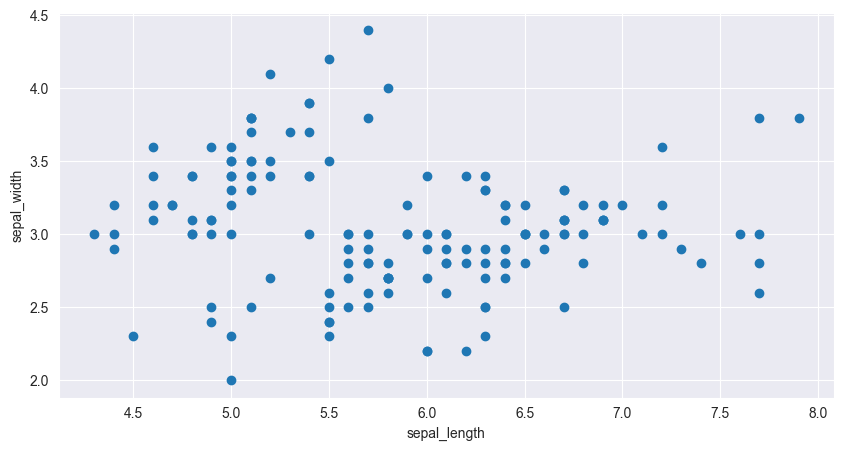

In [96]:
plt.figure(figsize=(10, 5))
plt.scatter(data['sepal_length'], data['sepal_width']);
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

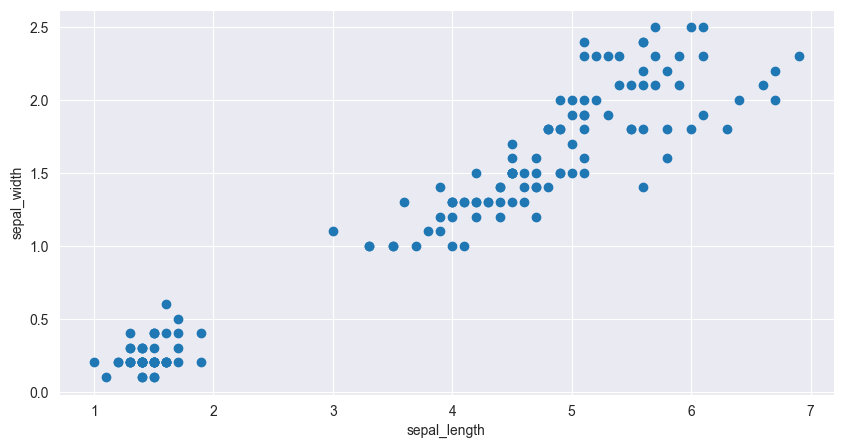

In [97]:
plt.figure(figsize=(10, 5))
plt.scatter(data['petal_length'], data['petal_width'], marker='o');
plt.ylabel('sepal_width')
plt.xlabel('sepal_length');

In [98]:
## checking the null values 
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [99]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [100]:
## converting species into label encoding

def map_species(f):
    if f == 'setosa':
        f = 0
    elif f == 'versicolor':
        f = 1
    elif f == 'virginica':
        f = 2
    return f

In [101]:
data['species'] = data.species.map(map_species)

In [102]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


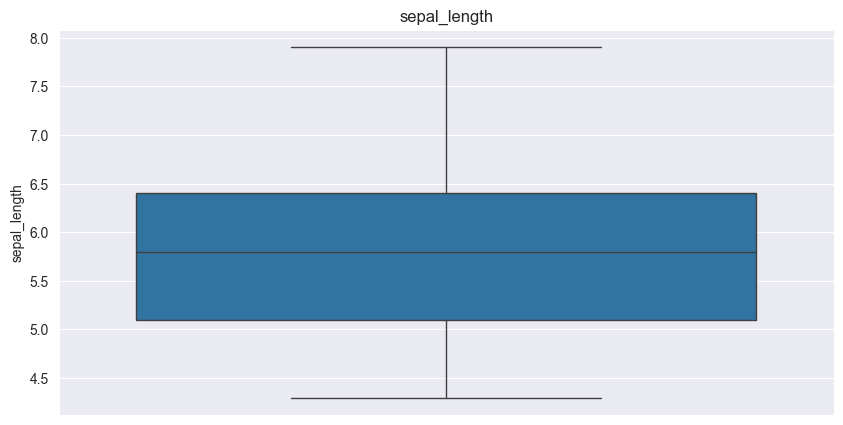

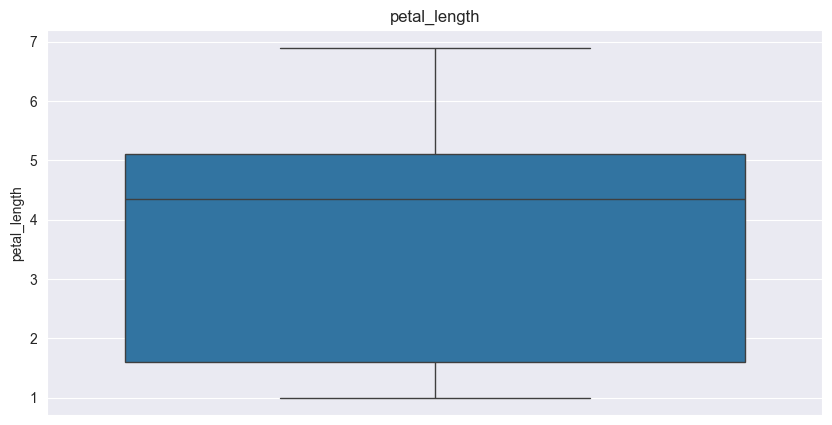

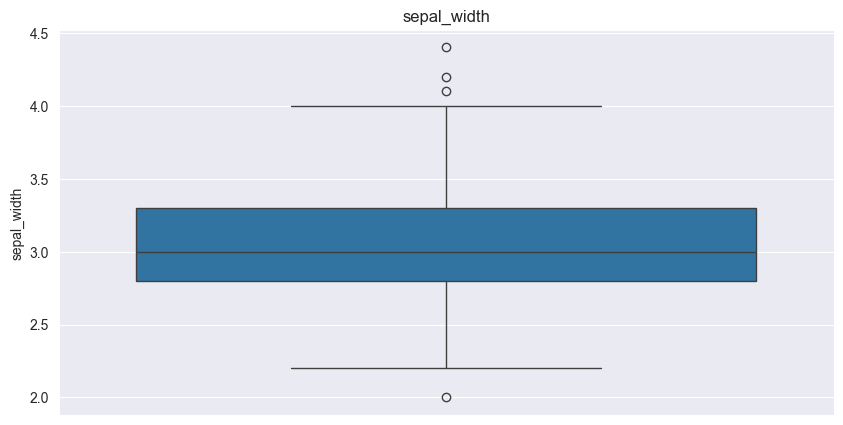

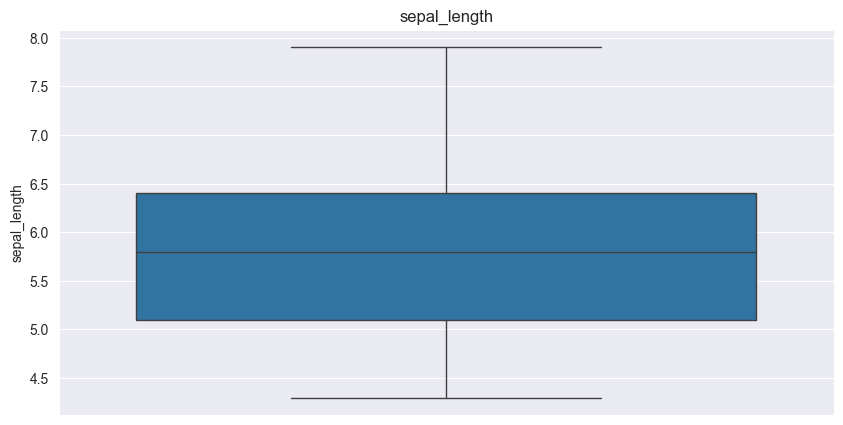

In [103]:
for f in ['sepal_length', 'petal_length', 'sepal_width', 'sepal_length']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[f])
    plt.title(f)

In [104]:
## independent and dependent features

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [105]:
## preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [108]:
lg = LogisticRegression()

In [109]:
lg.fit(X_train, y_train)

LogisticRegression()

In [110]:
pred = lg.predict(X_test)

---------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

------------------------------------------------Accuracy Score-------------------------------------------------
1.0
-----------------------------------------------Confustion Matrix-----------------------------------------------


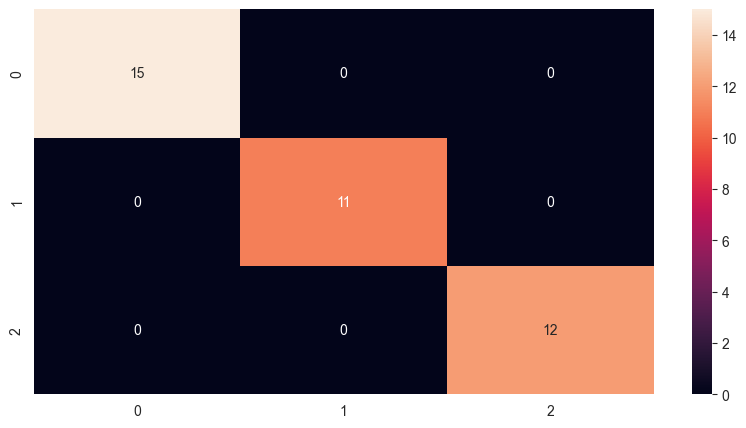

In [111]:
print("---------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------------Accuracy Score-------------------------------------------------")
print(accuracy_score(y_test, pred))

print("-----------------------------------------------Confustion Matrix-----------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);

In [112]:
pd.DataFrame({'Actual': y_test,  'Predicted': pred}).head(50)

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


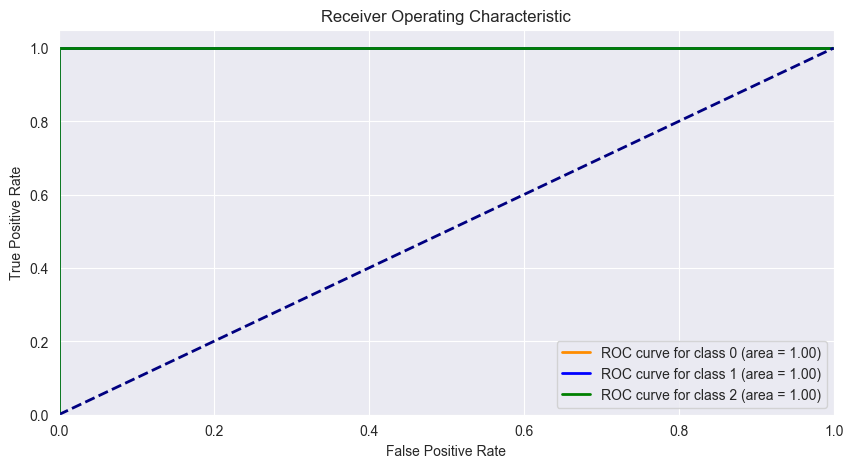

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for each class
y_prob = lg.predict_proba(X_test)

# Get the number of classes
n_classes = y_prob.shape[1] if len(y_prob.shape) > 1 else 2

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

if n_classes == 2:
    # Binary classification
    fpr[1], tpr[1], _ = roc_curve(y_test, y_prob[:, 1] if len(y_prob.shape) > 1 else y_prob)
    roc_auc[1] = roc_auc_score(y_test, y_prob[:, 1] if len(y_prob.shape) > 1 else y_prob)
else:
    # Multi-class classification
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 5))
colors = ['darkorange', 'blue', 'green']
for i in range(1 if n_classes == 2 else n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
             label='ROC curve for class %d (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Feature: 0, Score: -0.9898422386693428
Feature: 1, Score: 1.0897492998321123
Feature: 2, Score: -1.7910734296715272
Feature: 3, Score: -1.6573776033872534


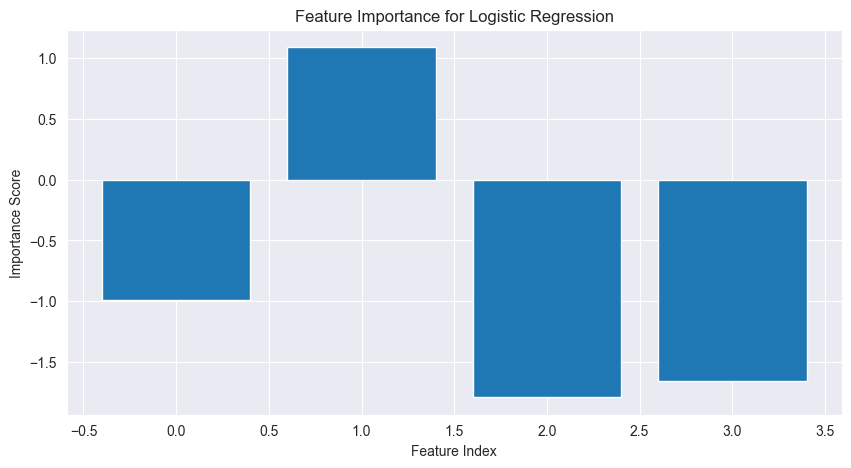

In [114]:
# Feature importance for logistic regression
importance = lg.coef_[0]
# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {v}')
# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Feature Importance for Logistic Regression')
plt.show()

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.93333333 0.96666667]
Mean CV Score: 0.9600000000000002
Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Best CV Score: 0.9800000000000001


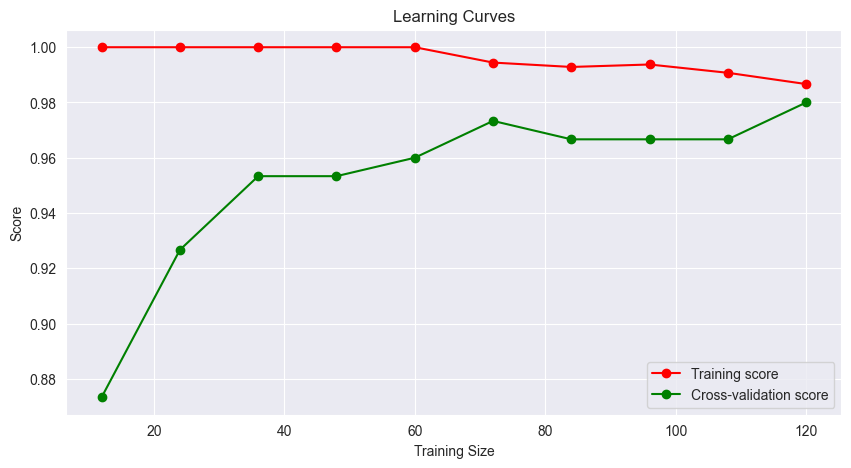

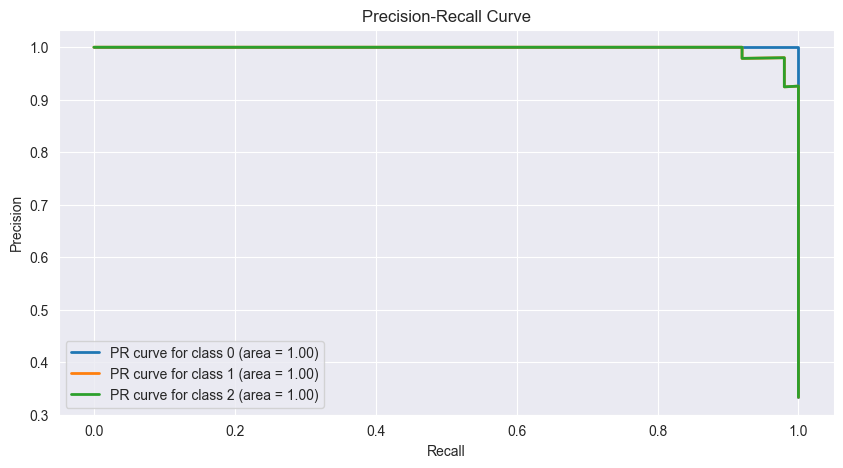

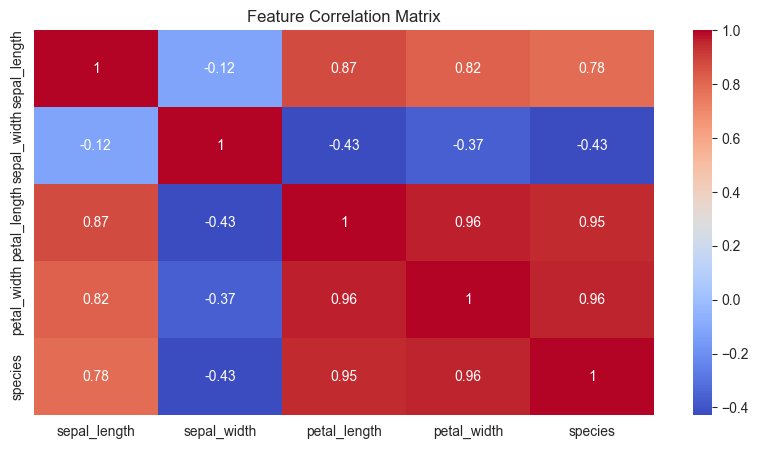

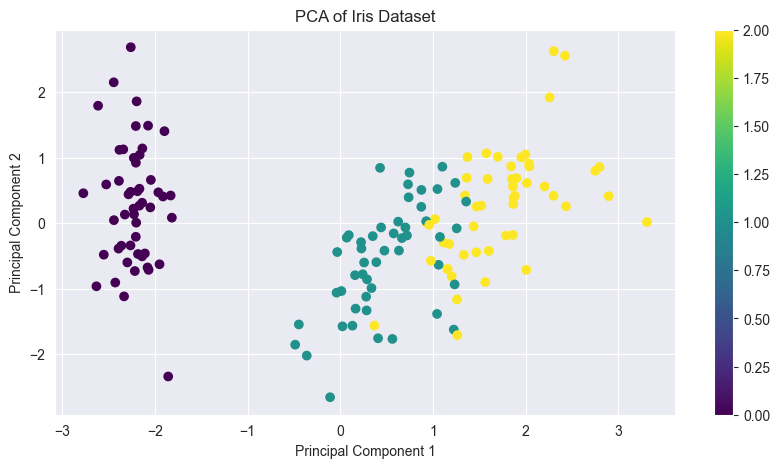

In [115]:
# Assuming X and y are already defined
X, y = shuffle(X, y, random_state=42)

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation
lg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(lg, X, y, cv=cv)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X, y)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X, y, cv=cv, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
best_model = grid_search.best_estimator_
y_prob = best_model.predict_proba(X)
n_classes = y_prob.shape[1]

precision = {}
recall = {}
pr_auc = {}

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y == i, y_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure(figsize=(10, 5))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'PR curve for class {i} (area = {pr_auc[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Feature Correlation
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter)
plt.show()